In [3]:
# Warming Models
'''
solar constant SWR = 1366 W/m^2 (at equator)
surface albedo ~= 30% (global average)
infrared radiationm heat loss = sigma * T^4 (Boltzmann law)

'''

import numpy as np

#Radiation balance assuming no Greenhouse effect

solar_constant = 1366
albedo = 0.3
boltzmann_constant = 5.6703744193e-8

Te = (solar_constant*(1-albedo) / (4*boltzmann_constant))**(1/4)
print('Average Earth Temp: %0.4f K, %0.4f C' % (Te, Te-273.15))
print('TOO COLD!')

Average Earth Temp: 254.8116 K, -18.3384 C
TOO COLD!


In [5]:
# use greenhouse effect:
'''
E = emmissivity ~= 78% (0% = no greenhouse effect)
Ta = tempof atmosphere
E * sigma * Ta^4 + (1-E)*sigma * Ta^4 = 0
'''

epsilon = 0.78

Ts = ((solar_constant*(1-albedo)/4) / (boltzmann_constant * (1-epsilon/2))) ** (1/4)
print('Average Earth Temp: %0.4f K, %0.4f C' % (Ts, Ts-273.15))

Average Earth Temp: 288.3280 K, 15.1780 C


In [8]:
# model added CO2
# doubling of C02 = Radiative forcing of 4
Ta = (epsilon * boltzmann_constant * Ts**4 / (2 * boltzmann_constant)) ** (1/4)
d_epsilon = -4 / (boltzmann_constant * Ta**4 - boltzmann_constant * Ts**4)
d_epsilon

0.01673290106672244

In [10]:
new_epsilon = epsilon + d_epsilon
new_epsilon

0.7967329010667225

In [12]:
Ts_new = ((solar_constant*(1-albedo)/4) / (boltzmann_constant * (1-new_epsilon/2))) ** (1/4) 
# blah blah ne formula results in +1 degree warming.. but should be 3! does not account for feedback loops
print(Ts_new - Ts)

0.9972030490922066


In [15]:
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

In [20]:
# Time dependance
u = np.zeros((M,))
M = 1
heat_C = 4.0e8 # Heat Capacity = J/m2/K

def myfunc(t, u): # heat balance function w/out GH effect
    f = np.zeros((M,))
    f[0] = (solar_constant*(1-albedo)/4 - boltzmann_constant*(u[0]**4)) / heat_C
    return f

u0 = np.zeros((M,))
t0 = 0.0
dt = 60*60*365*24 # one year in seconds (to keep SI units)
tmax = 100*dt
t = np.arange(t0, tmax, dt)
N = np.shape(t)[0]


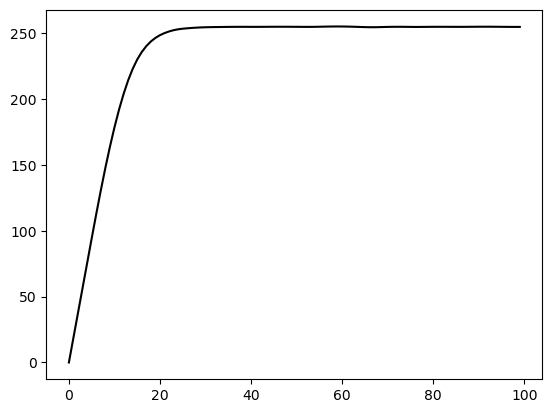

In [28]:
sol = solve_ivp(myfunc, [t0,tmax], u0, method='RK45', t_eval = t)

fig = plt.figure()
plt.plot(sol.t/(60*60*365*24), sol.y[0], 'k-')
#lt.xlabel('Time (Year)')
#plt.ylabel('Temperat#ure (K)')



In [ ]:
# with GHG absorption

M = 2

def myfunc(t, u): # heat balance function w/ 2 layer model GHG effect
    f = np.zeros((M,))
    # u[0] = Ta
    # u[1] = Ts
    
    f[0] = (solar_constant*(1-albedo)/4 - epsilon*boltzmann_constant*(u[0]**4) 
            - (1 - epsilon) * boltzmann_constant*(u[1]**4)) / heat_C
    f[1] = (solar_constant*(1-albedo)/4 + epsilon*boltzmann_constant*(u[0]**4)
            - boltzmann_constant*(u[1]**4)) / heat_C
    return f
    

